In [19]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Key Question : How does the demographic and the income level of the people affect the preference and acceptance of self-driving cars? 

### Preferences for self-driving cars by age, gender, education, and income levels
### Correlations between these variables

In [20]:
#Read raw file
df=pd.read_csv('https://raw.githubusercontent.com/EvaW01/schulich_ai_fundamentals/main/MMAI_Fundamental_Assignment.csv')

df.head()


,Unnamed: 0,Question_key,Interview_start_time,Interview_end_time,Device_Type,Language,Form_No,Tablet_category,Read_about_SelfDrive_Car,Widespread_use_SelfDrive_Car,...,People_Political_Party,People_Political_Type,People_Political_Type_Category,Income_Level,Vote_Registered_Adress,Ideology,Interaction_Frequency,Volume_Sum,Income_Class,Weight_99_Percent
0,0,100260.0,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,Form 2,Non-tablet HH,NaN,NaN,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314.0,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,Form 1,Non-tablet HH,A little,Not sure,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363.0,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,Form 1,Non-tablet HH,A little,Good idea for society,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598.0,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,Form 2,Non-tablet HH,NaN,NaN,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637.0,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,Form 2,Non-tablet HH,NaN,NaN,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606


In [21]:
unique_ages = df['Age'].unique()
unique_ages

array(['65+', '30-49', '50-64', '18-29', 'Refused'], dtype=object)

In [8]:
from scipy.stats import chi2_contingency

In [27]:
# Function to perform chi-square test and print the result
def chi_square_test(col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test between {col1} and {col2}:")
    print(f"Chi2: {chi2}, p-value: {p}, Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    print("\n")

# Perform chi-square tests for relevant pairs
chi_square_test('Gender', 'Read_about_SelfDrive_Car')
chi_square_test('Gender', 'Widespread_use_SelfDrive_Car')

Chi-square test between Gender and Read_about_SelfDrive_Car:
Chi2: 411.61390942965164, p-value: 4.55044222128367e-83, Degrees of freedom: 9
Expected frequencies:
[[1.44270328e+03 6.29943722e+02 1.93388317e+02 3.96468077e+00]
 [1.80496798e+03 7.88123423e+02 2.41948380e+02 4.96021735e+00]
 [1.97021153e+01 8.60275568e+00 2.64098583e+00 5.41432175e-02]
 [7.62662527e+00 3.33009897e+00 1.02231710e+00 2.09586649e-02]]


Chi-square test between Gender and Widespread_use_SelfDrive_Car:
Chi2: 238.5680712968734, p-value: 2.5752396757505966e-46, Degrees of freedom: 9
Expected frequencies:
[[1.00879100e+03 6.37432564e+02 6.18490200e+02 5.28624102e+00]
 [1.26209975e+03 7.97492723e+02 7.73793906e+02 6.61362313e+00]
 [1.37764409e+01 8.70502620e+00 8.44634194e+00 7.21909567e-02]
 [5.33281584e+00 3.36968756e+00 3.26955172e+00 2.79448865e-02]]




In [28]:
chi_square_test('Education', 'Read_about_SelfDrive_Car')
chi_square_test('Education', 'Widespread_use_SelfDrive_Car')


Chi-square test between Education and Read_about_SelfDrive_Car:
Chi2: 200.30213444489345, p-value: 2.8634133665196195e-38, Degrees of freedom: 9
Expected frequencies:
[[1.66514652e+03 7.27071609e+02 2.23205899e+02 4.57597516e+00]
 [5.57379197e+02 2.43374733e+02 7.47143412e+01 1.53172909e+00]
 [1.01688337e+01 4.44013196e+00 1.36308946e+00 2.79448865e-02]
 [1.04230545e+03 4.55113526e+02 1.39716670e+02 2.86435086e+00]]


Chi-square test between Education and Widespread_use_SelfDrive_Car:
Chi2: 228.23818197412112, p-value: 3.865668273476101e-44, Degrees of freedom: 9
Expected frequencies:
[[1.16433146e+03 7.35715117e+02 7.13852125e+02 6.10130021e+00]
 [3.89739957e+02 2.46267999e+02 2.38949738e+02 2.04230545e+00]
 [7.11042111e+00 4.49291675e+00 4.35940229e+00 3.72598486e-02]
 [7.28818164e+02 4.60523967e+02 4.46838735e+02 3.81913448e+00]]




In [29]:
chi_square_test('Income_Level', 'Read_about_SelfDrive_Car')
chi_square_test('Income_Level', 'Widespread_use_SelfDrive_Car')

Chi-square test between Income_Level and Read_about_SelfDrive_Car:
Chi2: 215.06899300326762, p-value: 3.2557796624855408e-31, Degrees of freedom: 27
Expected frequencies:
[[9.06932855e+02 3.96004269e+02 1.21570541e+02 2.49233456e+00]
 [2.94260625e+02 1.28486319e+02 3.94444013e+01 8.08655152e-01]
 [2.84091791e+02 1.24046187e+02 3.80813119e+01 7.80710266e-01]
 [2.84091791e+02 1.24046187e+02 3.80813119e+01 7.80710266e-01]
 [2.40874248e+02 1.05175626e+02 3.22881816e+01 6.61944498e-01]
 [2.22443237e+02 9.71278867e+01 2.98175820e+01 6.11294392e-01]
 [1.76047933e+02 7.68697846e+01 2.35984863e+01 4.83795847e-01]
 [1.95114496e+02 8.51950320e+01 2.61542791e+01 5.36192509e-01]
 [5.16068310e+02 2.25336697e+02 6.91767902e+01 1.41820299e+00]
 [1.55074714e+02 6.77120124e+01 2.07871143e+01 4.26159519e-01]]


Chi-square test between Income_Level and Widespread_use_SelfDrive_Car:
Chi2: 229.9775854794137, p-value: 4.320515290490974e-34, Degrees of freedom: 27
Expected frequencies:
[[6.34160683e+02 4.0071

In [30]:
chi_square_test('Age', 'Read_about_SelfDrive_Car')
chi_square_test('Age', 'Widespread_use_SelfDrive_Car')

Chi-square test between Age and Read_about_SelfDrive_Car:
Chi2: 74.33230606358681, p-value: 4.912372584646317e-11, Degrees of freedom: 12
Expected frequencies:
[[2.90447312e+02 1.26821269e+02 3.89332428e+01 7.98175820e-01]
 [1.04357656e+03 4.55668543e+02 1.39887056e+02 2.86784397e+00]
 [9.59048127e+02 4.18759946e+02 1.28556375e+02 2.63555211e+00]
 [9.70488065e+02 4.23755094e+02 1.30089851e+02 2.66699010e+00]
 [1.14399379e+01 4.99514846e+00 1.53347565e+00 3.14379973e-02]]


Chi-square test between Age and Widespread_use_SelfDrive_Car:
Chi2: 149.25129579159395, p-value: 8.043342288713858e-26, Degrees of freedom: 12
Expected frequencies:
[[2.03091403e+02 1.28328935e+02 1.24515428e+02 1.06423443e+00]
 [7.29706967e+02 4.61085581e+02 4.47383660e+02 3.82379197e+00]
 [6.70601591e+02 4.23738211e+02 4.11146128e+02 3.51406947e+00]
 [6.78600815e+02 4.28792742e+02 4.16050456e+02 3.55598680e+00]
 [7.99922375e+00 5.05453134e+00 4.90432758e+00 4.19173297e-02]]




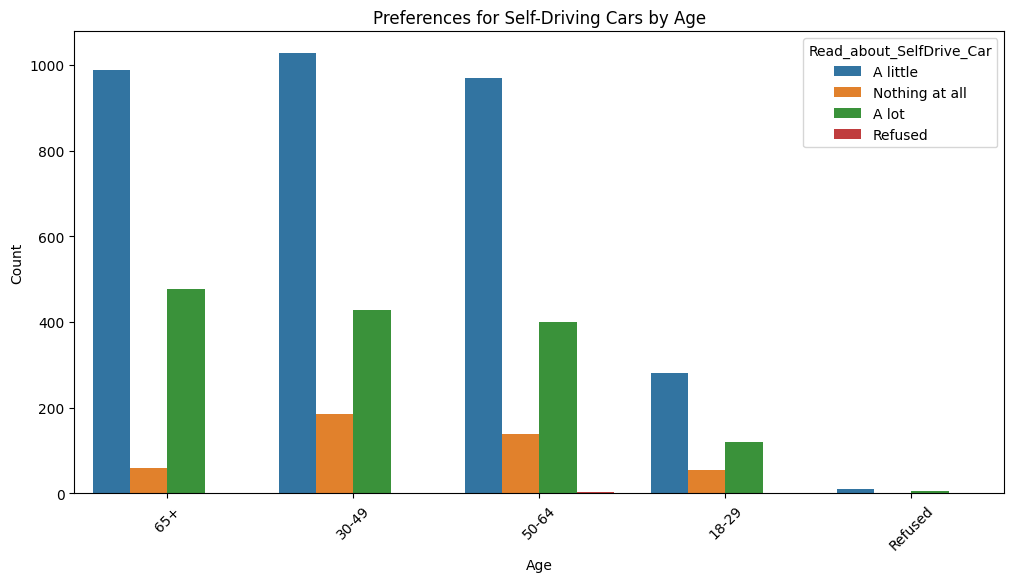

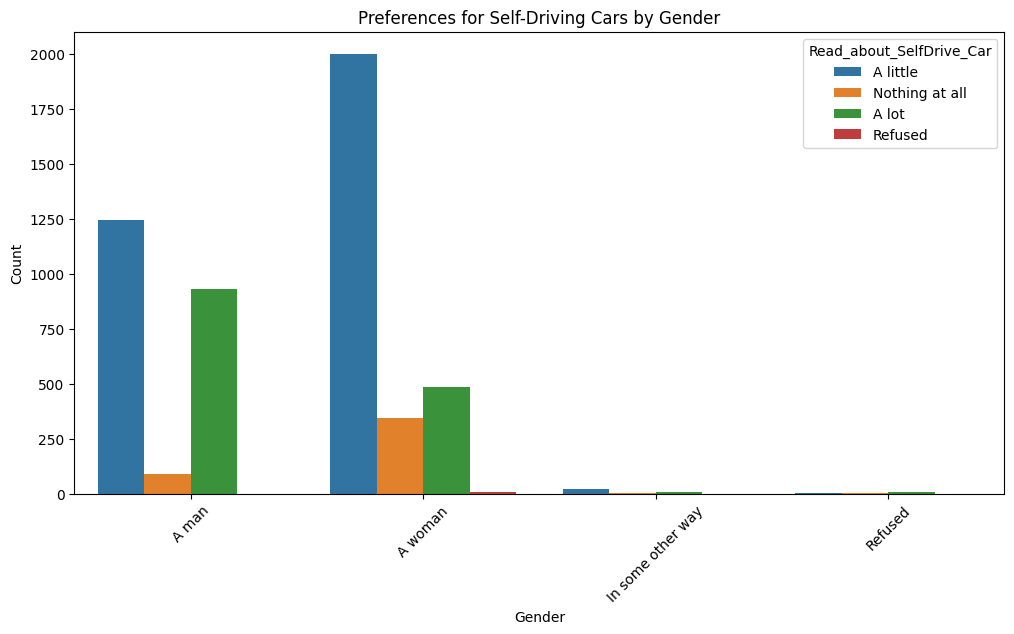

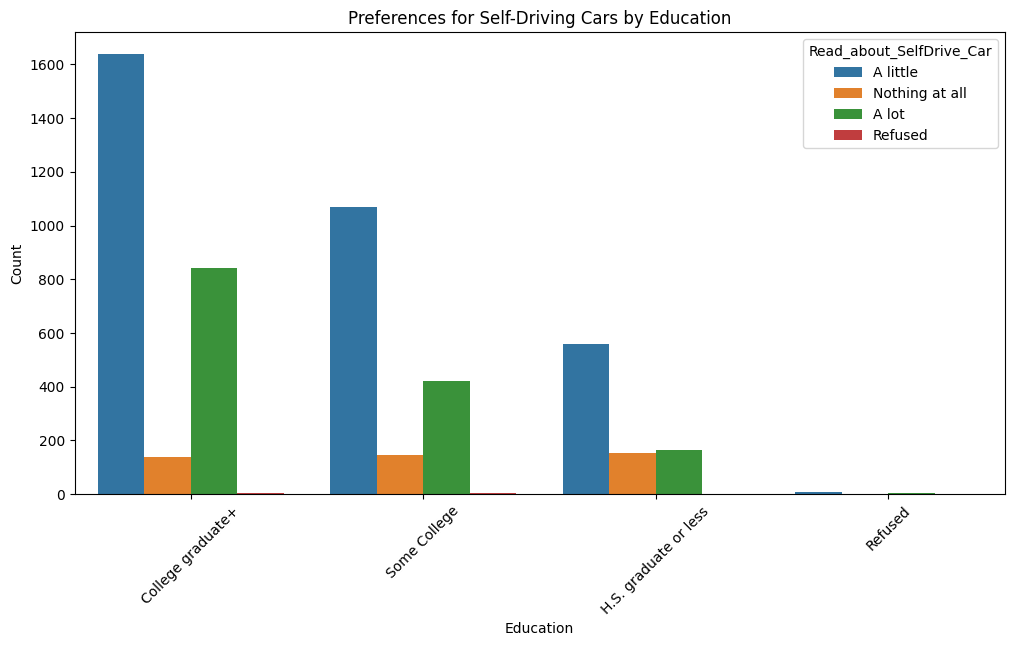

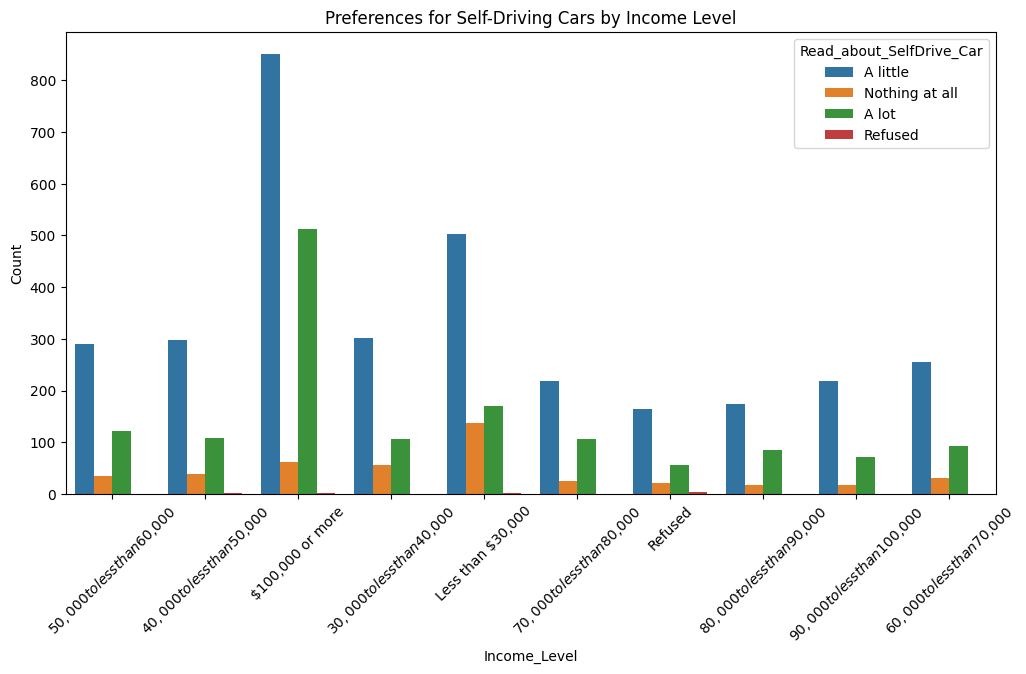

In [34]:
# Create count plots for preferences

plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Read_about_SelfDrive_Car', data=df)
plt.title('Preferences for Self-Driving Cars by Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Read_about_SelfDrive_Car', data=df)
plt.title('Preferences for Self-Driving Cars by Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='Read_about_SelfDrive_Car', data=df)
plt.title('Preferences for Self-Driving Cars by Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Income_Level', hue='Read_about_SelfDrive_Car', data=df)
plt.title('Preferences for Self-Driving Cars by Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


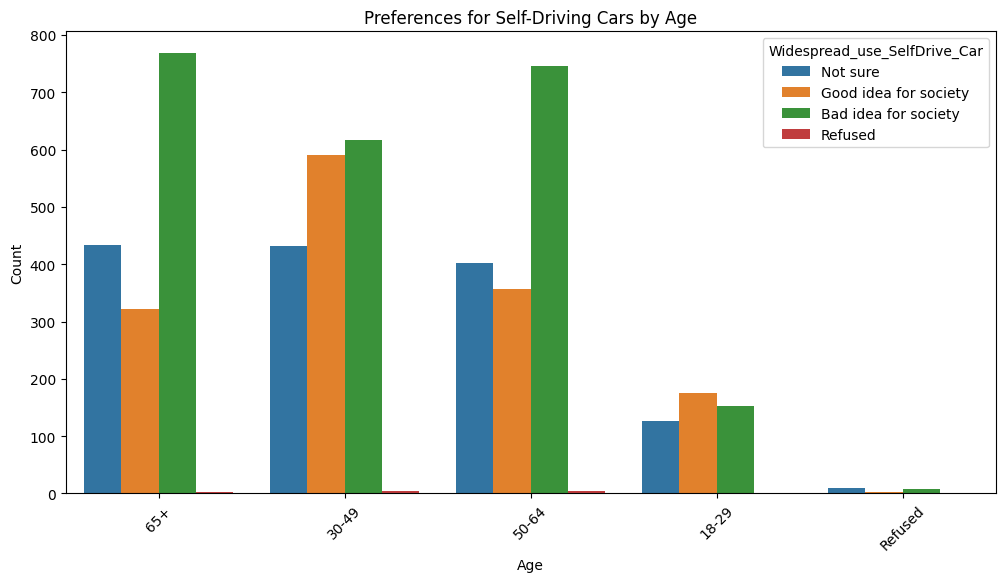

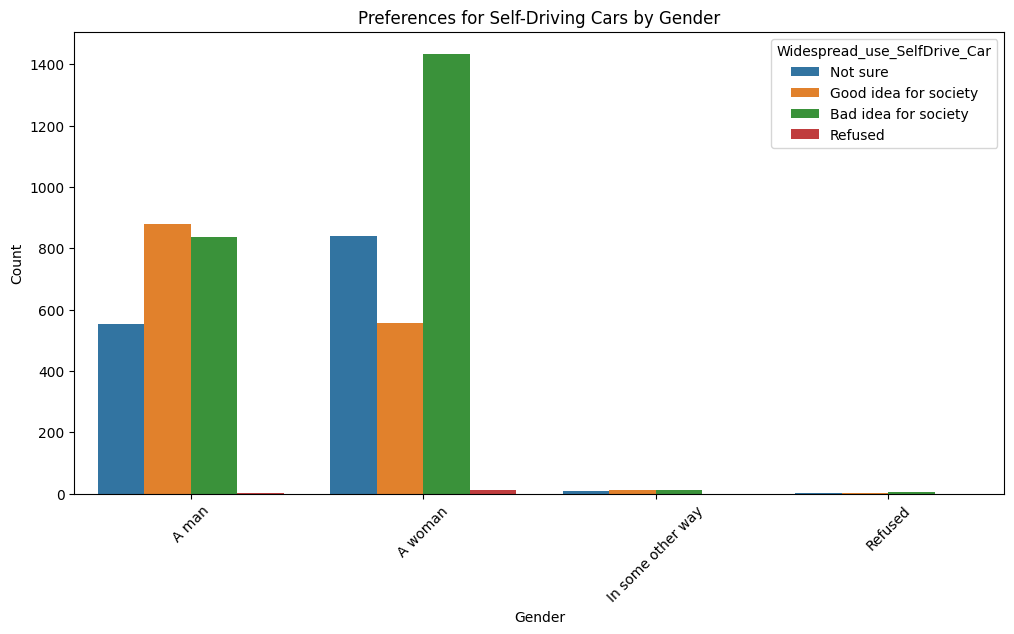

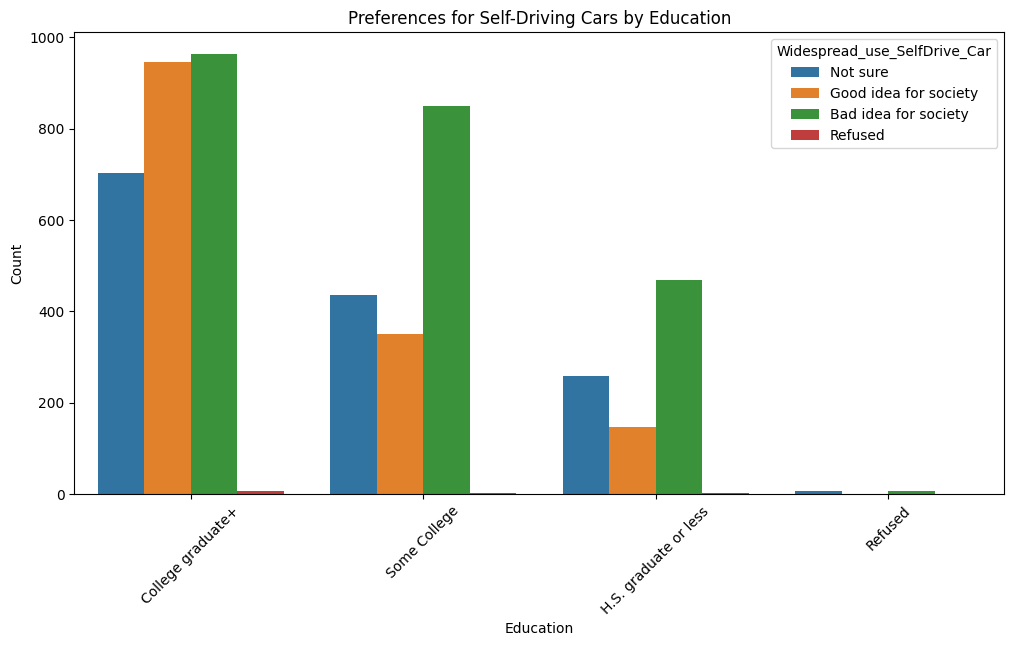

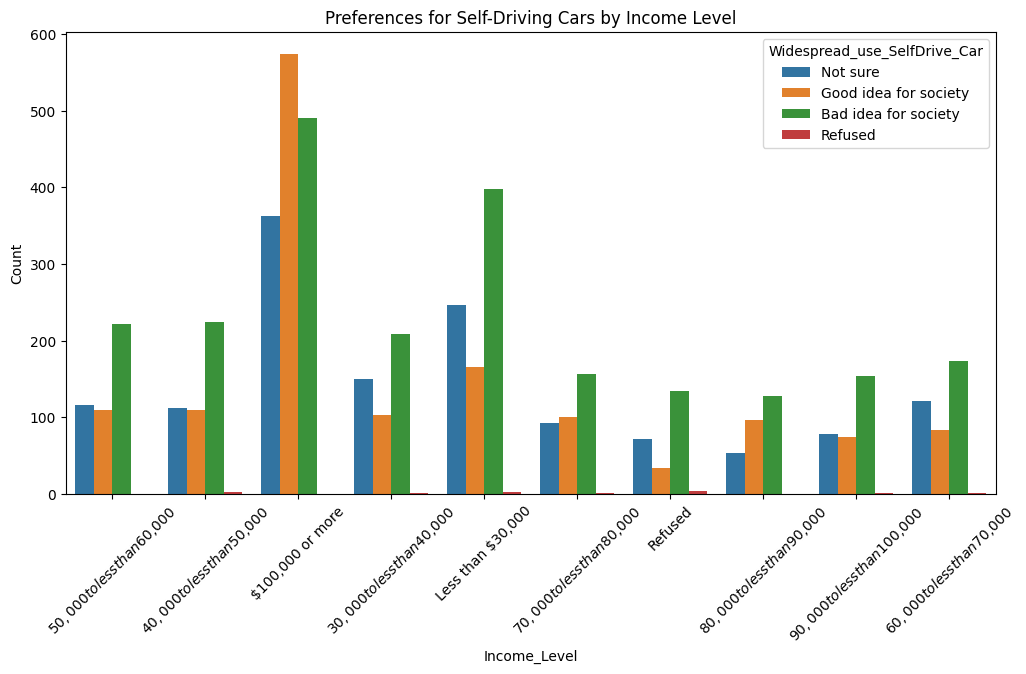

In [32]:
# Create count plots for preferences

plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Widespread_use_SelfDrive_Car', data=df)
plt.title('Preferences for Self-Driving Cars by Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Widespread_use_SelfDrive_Car', data=df)
plt.title('Preferences for Self-Driving Cars by Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='Widespread_use_SelfDrive_Car', data=df)
plt.title('Preferences for Self-Driving Cars by Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Income_Level', hue='Widespread_use_SelfDrive_Car', data=df)
plt.title('Preferences for Self-Driving Cars by Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
